# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 9 - Regresión Lineal: Intro
### Pilar García y Sonia Ruiz Pérez

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
pd.options.display.max_columns=None

In [5]:
#Creamos el dataframe con el csv con nuestros datos.
df=pd.read_csv('files/taxis4_encoding.csv',index_col=0)
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_no_zeros,tip_box,passengers_robust,distance_robust,fare_robust,tolls_robust,total_robust,x0_green,x0_yellow,payment_cash,payment_credit_card,pickup_borough_oe,dropoff_borough_map
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2.150000e+00,0.787753,0.0,-0.022624,-0.294118,0.0,-0.127368,0,1,0,1,2,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1.000000e-10,-10.996744,0.0,-0.389140,-0.529412,0.0,-0.511579,0,1,1,0,2,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,Alphabet City,West Village,Manhattan,Manhattan,2.360000e+00,0.886769,0.0,-0.126697,-0.235294,0.0,0.000000,0,1,0,1,2,0


- Deberéis separar la X y la y.

In [25]:
# X: variables predictoras (independientes)
# Seleccionamos solo las columnas estandarizadas y codificadas
X=df[['payment_cash','payment_credit_card','pickup_borough_oe','dropoff_borough_map','passengers_robust',
        'fare_robust','tolls_robust','total_robust']]
X.head(3)

,payment_cash,payment_credit_card,pickup_borough_oe,dropoff_borough_map,passengers_robust,fare_robust,tolls_robust,total_robust
0,0,1,2,0,0.0,-0.294118,0.0,-0.127368
1,1,0,2,0,0.0,-0.529412,0.0,-0.511579
2,0,1,2,0,0.0,-0.235294,0.0,0.000000


In [26]:
# y: variable respuesta (dependiente)
y=df['tip_box']
y.head(3)

0     0.787753
1   -10.996744
2     0.886769
Name: tip_box, dtype: float64

- Deberéis crear el train y el test.

In [13]:
# random_state = 42 --> semilla, para que siempre tenga los mismos datos
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

- Ajustar vuestro modelo.

In [14]:
#Iniciamos la regresión lineal.
lr=LinearRegression(n_jobs=-1)

In [15]:
#Ajustamos el modelo, le pasamos los datos de entrenamiento.
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [16]:
#Hacemos las predicciones.
y_predict_train=lr.predict(x_train)
y_predict_test=lr.predict(x_test)

In [27]:
#Creamos un dataframe para visualizar mejor los datos.
df_train=pd.DataFrame({'Real':y_train,'Predicted':y_predict_train,'Set':['Train']*len(y_train)})
df_test=pd.DataFrame({'Real':y_test,'Predicted':y_predict_test,'Set':['Test']*len(y_test)})
df_resultado=pd.concat([df_train, df_test],axis=0)
df_resultado['Remainder']=df_resultado['Real']-df_resultado['Predicted']
df_resultado.head(3)

,Real,Predicted,Set,Remainder
4414,-10.996744,-9.810353,Train,-1.186392
334,1.362352,1.054786,Train,0.307566
3593,-10.996744,-15.766131,Train,4.769387


`La columna 'Real' son nuestros datos observados, la columna 'Predicted' es la prediccion que ha hecho el modelo de regresion lineal y la columna 'Remainder' es la diferencia entre los valores reales (observados) y los predichos, es decir, los residuos.`

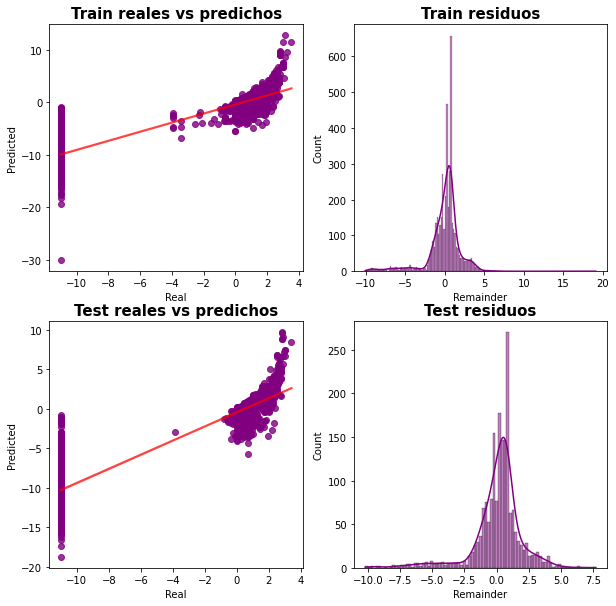

In [22]:
#Representamos los datos obtenidos.
fig, axes = plt.subplots(2,2,figsize=(10,10))

# Representamos los valores reales y los valores predichos
sns.regplot(data = df_resultado[df_resultado['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = axes[0,0], 
            color = "purple",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = df_resultado[df_resultado['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "purple",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = axes[1,0])


# Representamos los residuos de los valores de entrenamiento
sns.histplot(df_resultado[df_resultado['Set'] == "Train"],
             x="Remainder",
             color ="purple",
             kde=True, 
             ax = axes[0,1])

#Representamos los residuos de los valores de test
sns.histplot(df_resultado[df_resultado['Set'] == "Test"],
             x="Remainder",
             color = "purple",
             kde=True, 
             ax = axes[1,1])

axes[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
axes[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
axes[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
axes[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

`En las gráficas 'regplot' podemos ver que los puntos están distribuidos de forma similar en los datos observados y los datos predichos. Además, la distribución de frecuencias de los residuos sigue una forma también similar, siendo en su mayoría cercana a 0.`

In [23]:
# Vamos a realizar la validación cruzada repetida con múltiples métricas para comprobar sus diferencias
#  con el modelo anterior.

cv_scores = cross_validate(estimator = LinearRegression(), X = X, y = y,
                            scoring = ('r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                        'neg_root_mean_squared_error'), cv= 10)

# Convertimos el diccionario a dataframe para facilitar su visualización.
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.005025,0.003710,0.916162,-1.008578,-2.592372,-1.610084
1,0.004574,0.004653,0.898831,-1.062961,-3.118084,-1.765810
2,0.005158,0.004778,0.876358,-1.113929,-3.596107,-1.896341
3,0.012214,0.003682,0.914071,-1.025843,-2.557180,-1.599119
4,0.005487,0.003713,0.896280,-1.044675,-3.016137,-1.736703
5,0.003900,0.003446,0.902814,-1.080375,-2.976299,-1.725195
6,0.004307,0.004756,0.886551,-1.124334,-3.442200,-1.855317
7,0.004127,0.004281,0.899019,-1.028288,-3.021304,-1.738190
8,0.009777,0.004344,0.756992,-1.994301,-8.672754,-2.944954
9,0.005772,0.004502,0.646469,-2.610963,-10.954349,-3.309735


In [28]:
print('La media para R² es:', cv_scores['test_r2'].mean().round(2))
print('---------')
print('La media para MAE es:', abs(cv_scores['test_neg_mean_absolute_error'].mean().round(2)))
print('---------')
print('La media para MSE es:', abs(cv_scores['test_neg_mean_squared_error'].mean().round(2)))
print('---------')
print('La media para RMSE es:', abs(cv_scores['test_neg_root_mean_squared_error'].mean().round(2)))

La media para R² es: 0.86
---------
La media para MAE es: 1.31
---------
La media para MSE es: 4.39
---------
La media para RMSE es: 2.02


`Estas métricas nos dan información de cómo de bueno es nuestro modelo. En el siguiente pair aprenderemos a interpretar estos valores obtenidos.`

**Happy coding** 🤔